# Heuristic Search in the Farmer, Wolf, Cat, Mouse, Cheese, Cabbage Problem

Now we will extend our solution for the Farmer, Wolf, Cat, Mouse, Cheese, Cabbage problem to use a heuristic function.

A heuristic function is a function that *estimates* the distance from the current node to the goal. 

A heuristic function is an estimate, since it must be cheap to compute. The heuristic function must be able to be computed quickly, since it must be applied to every node. Otherwise, we could search the entire space, find the solution, and then assign heuristic values, but that would be just as hard as solving the original problem.



Below is the original code that we developed for the Farmer, Wolf, Cat, Mouse, Cheese, and Cabbage problem.

In [60]:
from graphviz import Digraph

graph = Digraph(comment='The Farmer, Wolf, Cat, Mouse, Cheese, Cabbage Puzzle')

initial = { 'wolf': 'left', 'cabbage':'left', 'cat' : 'left', 'mouse' : 'left', 'cheese' : 'left', 'farmer':'left' }

def isGoal( state ):
    goal = True
    for k in state:
        if ( state[k] != 'right'):
            goal = False
            break
    return goal

def isValidState( state ):
    valid = True
    checkSide = otherSide( state['farmer'] )
    if ( state['cat'] == checkSide ) and ( state['mouse'] == checkSide ):
        valid = False
    elif ( state['wolf'] != checkSide ) and ( state['mouse'] == checkSide ) and ( state['cabbage'] == checkSide ):
        valid = False
    elif ( state['wolf'] != checkSide ) and ( state['mouse'] == checkSide ) and ( state['cheese'] == checkSide ):
        valid = False
    return valid

def otherSide( side ):
    other = '?'
    if ( side == 'left'):
        other = 'right'
    elif (side == 'right'):
        other = 'left'
    return other

def toString( state ):
    right=''
    left=''
    for k in state:
        if ( state[k] == 'right'):
            if right == '':
                sep = ''
            else:
                sep = ','
            right = right + sep + k[0:3]
        elif ( state[k] == 'left'):
            if left == '':
                sep = ''
            else:
                sep = ','
            left = left + sep + k[0:3]
    return left + '|----|' + right
            
def successors( state, isValid ):
    farmerSide=state['farmer']
    children = []
    for k in state:
        if ( state[k] == farmerSide ):
            newState = state.copy()
            newState[k] = otherSide( farmerSide )
            newState['farmer'] = otherSide( farmerSide )
            if ( isValid( newState ) ):
                children = children + [ (newState, "move " + k + " to " + otherSide( farmerSide ) ) ]
    return children


## Heuristic Search Implementation

We need to replace the `search` function in our original implementation to make use of the heuristic function.

`heuristic` is a new parameter that takes as argument node (i.e., a state, history, and associated information) and returns an estimate of the distance to the goal.


In [61]:
def printQueue( queue, limit = 0 ):
    for i in range( len( queue ) - 1, -1, -1 ):
        node = queue[i]
        state, label, level, heuristic, history, actions = node
        print('Node', 's', state, 'lvl', level, 'h', heuristic )
        if ( limit != 0 ) and ( len(queue) - 1 - i >= limit ):
            break

In [68]:
def search( initial, dfs, isGoal, isValid, successors, heuristic, depthLimit = 0, log = False ):
    """
    <code>heuristic</code> is a new parameter that takes as argument a node and 
    returns an estimate of the distance to the goal.
    """
    global graph

    queue = [ ( initial, 'N1', 0, 0, [initial], ['*** initial ***'] ) ]
    graph = Digraph('Search Space')
    graph.node('N1', toString( initial ) )
    numNodes = 1
    result = None
    while( len(queue) > 0 ):
        if ( log ):
            print('*** Start of Current Qeue ***')
            printQueue( queue )
            print('*** End of Current Qeue ***')
        node = queue.pop()
        state, label, level, hval, history, actions = node
        if ( log ):
            print('search: expanding node ', label, 'level', level, 'with state', state, 'h', hval )
        last = len(queue)
        if ( depthLimit <= 0 ) or ( level < depthLimit ):
            if ( isGoal( state ) ):
                result = ( state, history, actions + [ '*** goal ***' ], numNodes )
                break
            children = successors( state, isValid )
            childrenNodes = []
            for ns, na in children:
                if ( ns not in history ):
                    nlabel = 'N' + str(numNodes)
                    node = [ ns, nlabel, level+1, 0, history + [ ns], actions + [na] ]
                    h = heuristic( node )
                    node[3] = h
                    cind = len(childrenNodes)
                    for i in range( len( childrenNodes ) ):
                        if ( h >= childrenNodes[i][0] ):
                            cind = i
                            break
                    childrenNodes.insert( cind, ( h, node ) )

                    numNodes = numNodes + 1
                    if ( isGoal( ns ) ):
                        graph.node(nlabel, toString( ns ) + "\n" + "H:" + str(h), shape='rectangle' ) 
                    else:
                        graph.node( nlabel, toString( ns ) + "\n" + "H:" + str(h), shape='round' )
                    graph.edge(label, nlabel, label=na )
            if ( len( childrenNodes ) == 0 ) and ( log ):
                print('<<<<<<<<<<<<< Backtracking <<<<<<<<<<<<<')
            while( len( childrenNodes ) > 0 ):
                h, node = childrenNodes.pop()
                queue.insert( last, node )
                
    if result is None:
        result = [ numNodes ]
    return result

Now we define various search functions that call `search` with the appropriate set of parameters.

In [69]:
def HillClimbingSearch( initial, isGoal, isValid, successors, heuristic, depthLimit, log ):
    return search( initial, None, isGoal, isValid, successors, heuristic, depthLimit, log )

## Heuristic Function

Now let us define a simple heuristic function that we can use. One idea is to count the number of items that are already on the right side of the river.

In [70]:
def heuristicGoalDiff( node ):
    state, label, level, _, history, action = node
    count = 0
    for item in state:
        if ( state[item] == 'left' ):
            count = count + 1
    return count
    

In [71]:
HillClimbingSearch( initial, isGoal, isValidState, successors, heuristicGoalDiff, -1, True )

*** Start of Current Qeue ***
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'left', 'cheese': 'left', 'farmer': 'left'} lvl 0 h 0
*** End of Current Qeue ***
search: expanding node  N1 level 0 with state {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'left', 'cheese': 'left', 'farmer': 'left'} h 0
*** Start of Current Qeue ***
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'left', 'cheese': 'left', 'farmer': 'right'} lvl 1 h 4
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'} lvl 1 h 4
*** End of Current Qeue ***
search: expanding node  N1 level 1 with state {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'left', 'cheese': 'left', 'farmer': 'right'} h 4
*** Start of Current Qeue ***
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'left', 'cheese': 'left', 'farmer': 'left'} lvl 2 h 5
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'left

({'cabbage': 'right',
  'cat': 'right',
  'cheese': 'right',
  'farmer': 'right',
  'mouse': 'right',
  'wolf': 'right'},
 [{'cabbage': 'left',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'left',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'right',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'left',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'right',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'right',
   'cheese': 'right',
   'farmer': 'right',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'right',
   'cheese': 'right',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabba

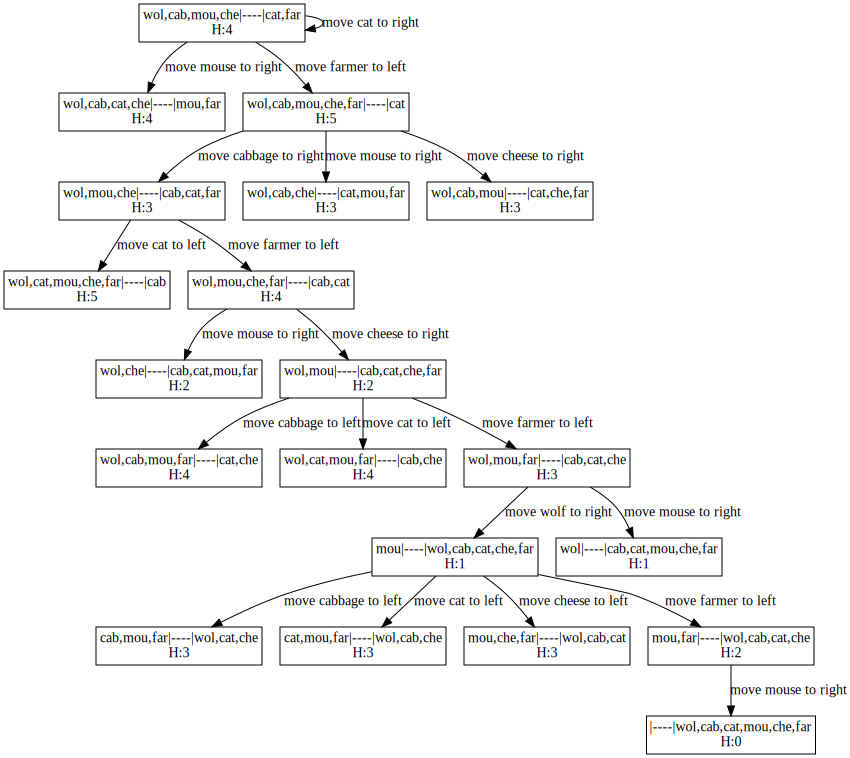

In [66]:
graph

In [73]:
HillClimbingSearch( initial, isGoal, isValidState, successors, lambda x: - heuristicGoalDiff(x), -1, True )

*** Start of Current Qeue ***
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'left', 'cheese': 'left', 'farmer': 'left'} lvl 0 h 0
*** End of Current Qeue ***
search: expanding node  N1 level 0 with state {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'left', 'cheese': 'left', 'farmer': 'left'} h 0
*** Start of Current Qeue ***
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'left', 'cheese': 'left', 'farmer': 'right'} lvl 1 h -4
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'} lvl 1 h -4
*** End of Current Qeue ***
search: expanding node  N1 level 1 with state {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'left', 'cheese': 'left', 'farmer': 'right'} h -4
*** Start of Current Qeue ***
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'left', 'cheese': 'left', 'farmer': 'left'} lvl 2 h -5
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': '

*** End of Current Qeue ***
search: expanding node  N25 level 13 with state {'wolf': 'right', 'cabbage': 'right', 'cat': 'right', 'mouse': 'left', 'cheese': 'right', 'farmer': 'right'} h -1
*** Start of Current Qeue ***
Node s {'wolf': 'left', 'cabbage': 'right', 'cat': 'right', 'mouse': 'left', 'cheese': 'right', 'farmer': 'left'} lvl 14 h -3
Node s {'wolf': 'right', 'cabbage': 'left', 'cat': 'right', 'mouse': 'left', 'cheese': 'right', 'farmer': 'left'} lvl 14 h -3
Node s {'wolf': 'right', 'cabbage': 'right', 'cat': 'left', 'mouse': 'left', 'cheese': 'right', 'farmer': 'left'} lvl 14 h -3
Node s {'wolf': 'right', 'cabbage': 'right', 'cat': 'right', 'mouse': 'left', 'cheese': 'right', 'farmer': 'left'} lvl 14 h -2
Node s {'wolf': 'right', 'cabbage': 'right', 'cat': 'left', 'mouse': 'right', 'cheese': 'right', 'farmer': 'right'} lvl 11 h -1
Node s {'wolf': 'right', 'cabbage': 'left', 'cat': 'right', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'} lvl 9 h -2
Node s {'wolf': 'righ

Node s {'wolf': 'right', 'cabbage': 'right', 'cat': 'right', 'mouse': 'left', 'cheese': 'right', 'farmer': 'left'} lvl 14 h -2
Node s {'wolf': 'right', 'cabbage': 'right', 'cat': 'left', 'mouse': 'right', 'cheese': 'right', 'farmer': 'right'} lvl 11 h -1
Node s {'wolf': 'right', 'cabbage': 'left', 'cat': 'right', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'} lvl 9 h -2
Node s {'wolf': 'right', 'cabbage': 'left', 'cat': 'left', 'mouse': 'right', 'cheese': 'right', 'farmer': 'right'} lvl 9 h -2
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'} lvl 7 h -3
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'right', 'cheese': 'right', 'farmer': 'right'} lvl 7 h -3
Node s {'wolf': 'left', 'cabbage': 'right', 'cat': 'right', 'mouse': 'left', 'cheese': 'left', 'farmer': 'left'} lvl 4 h -4
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'} lvl 3

({'cabbage': 'right',
  'cat': 'right',
  'cheese': 'right',
  'farmer': 'right',
  'mouse': 'right',
  'wolf': 'right'},
 [{'cabbage': 'left',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'left',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'right',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'left',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'right',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'right',
   'mouse': 'right',
   'wolf': 'left'},
  {'cabbage': 'left',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'right',
   'wolf': 'left'},
  {'cabbage':

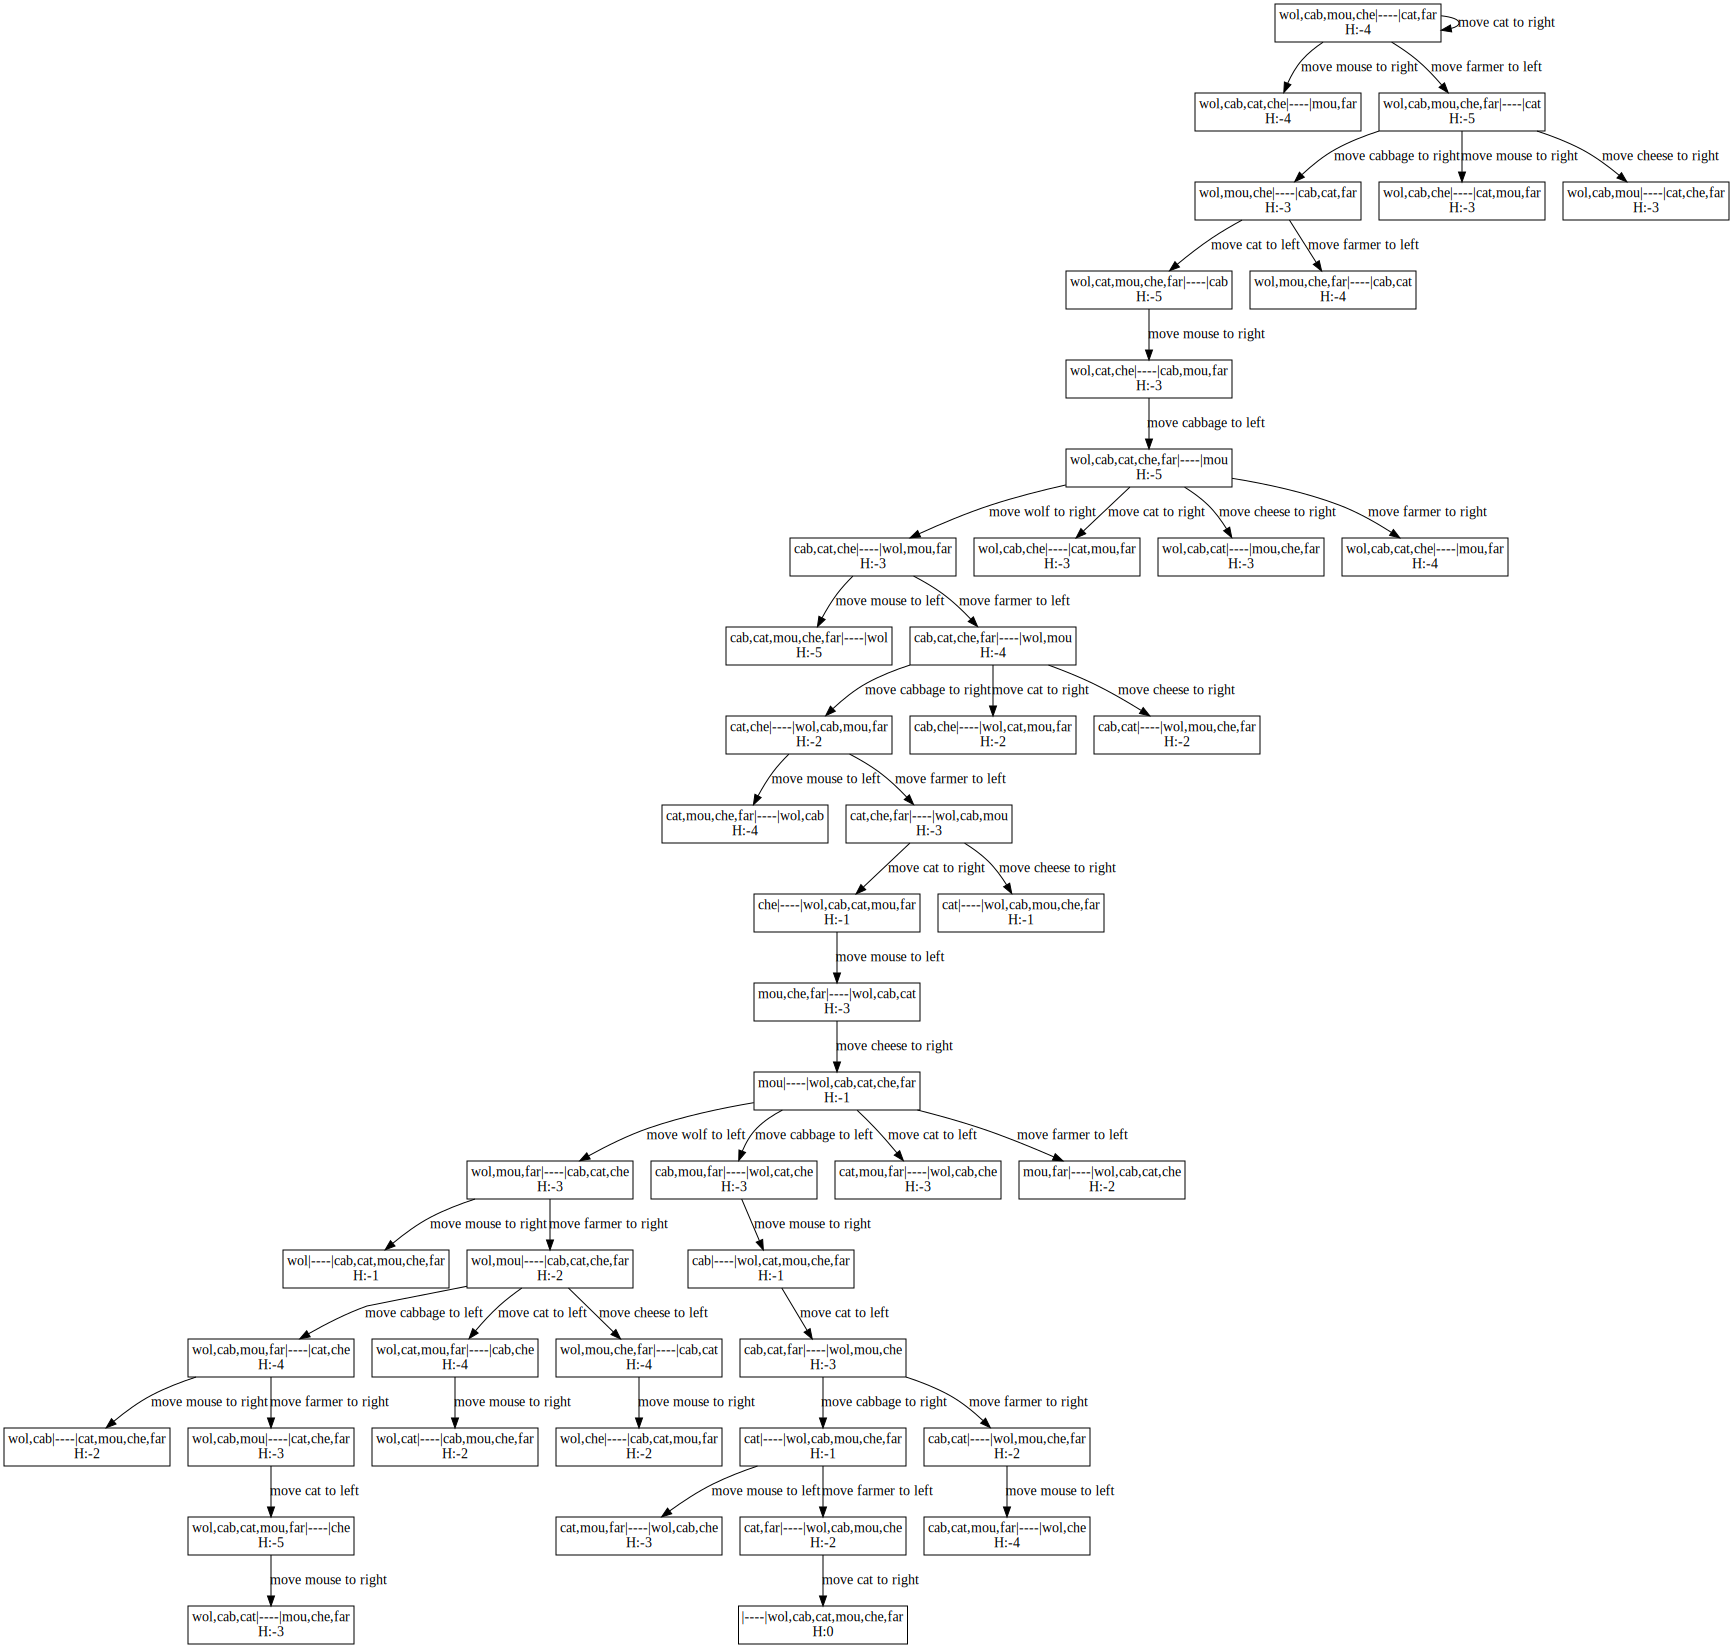

In [74]:
graph

In [77]:
HillClimbingSearch( initial, isGoal, isValidState, successors, lambda x: 0, -1, True )

*** Start of Current Qeue ***
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'left', 'cheese': 'left', 'farmer': 'left'} lvl 0 h 0
*** End of Current Qeue ***
search: expanding node  N1 level 0 with state {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'left', 'cheese': 'left', 'farmer': 'left'} h 0
*** Start of Current Qeue ***
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'left', 'cheese': 'left', 'farmer': 'right'} lvl 1 h 0
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'} lvl 1 h 0
*** End of Current Qeue ***
search: expanding node  N1 level 1 with state {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'left', 'cheese': 'left', 'farmer': 'right'} h 0
*** Start of Current Qeue ***
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'left', 'cheese': 'left', 'farmer': 'left'} lvl 2 h 0
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'left

Node s {'wolf': 'right', 'cabbage': 'left', 'cat': 'left', 'mouse': 'right', 'cheese': 'right', 'farmer': 'right'} lvl 9 h 0
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'} lvl 7 h 0
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'right', 'cheese': 'right', 'farmer': 'right'} lvl 7 h 0
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'} lvl 7 h 0
Node s {'wolf': 'left', 'cabbage': 'right', 'cat': 'right', 'mouse': 'left', 'cheese': 'left', 'farmer': 'left'} lvl 4 h 0
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'} lvl 3 h 0
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'left', 'cheese': 'right', 'farmer': 'right'} lvl 3 h 0
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'} lvl 1 h 0
*** End of

Node s {'wolf': 'right', 'cabbage': 'left', 'cat': 'left', 'mouse': 'right', 'cheese': 'right', 'farmer': 'right'} lvl 17 h 0
Node s {'wolf': 'right', 'cabbage': 'right', 'cat': 'left', 'mouse': 'left', 'cheese': 'right', 'farmer': 'left'} lvl 14 h 0
Node s {'wolf': 'right', 'cabbage': 'right', 'cat': 'right', 'mouse': 'left', 'cheese': 'right', 'farmer': 'left'} lvl 14 h 0
Node s {'wolf': 'right', 'cabbage': 'right', 'cat': 'left', 'mouse': 'right', 'cheese': 'right', 'farmer': 'right'} lvl 11 h 0
Node s {'wolf': 'right', 'cabbage': 'left', 'cat': 'right', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'} lvl 9 h 0
Node s {'wolf': 'right', 'cabbage': 'left', 'cat': 'left', 'mouse': 'right', 'cheese': 'right', 'farmer': 'right'} lvl 9 h 0
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'} lvl 7 h 0
Node s {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'right', 'cheese': 'right', 'farmer': 'right'} lvl 7 h 

({'cabbage': 'right',
  'cat': 'right',
  'cheese': 'right',
  'farmer': 'right',
  'mouse': 'right',
  'wolf': 'right'},
 [{'cabbage': 'left',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'left',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'right',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'left',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'right',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'right',
   'mouse': 'right',
   'wolf': 'left'},
  {'cabbage': 'left',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'right',
   'wolf': 'left'},
  {'cabbage':

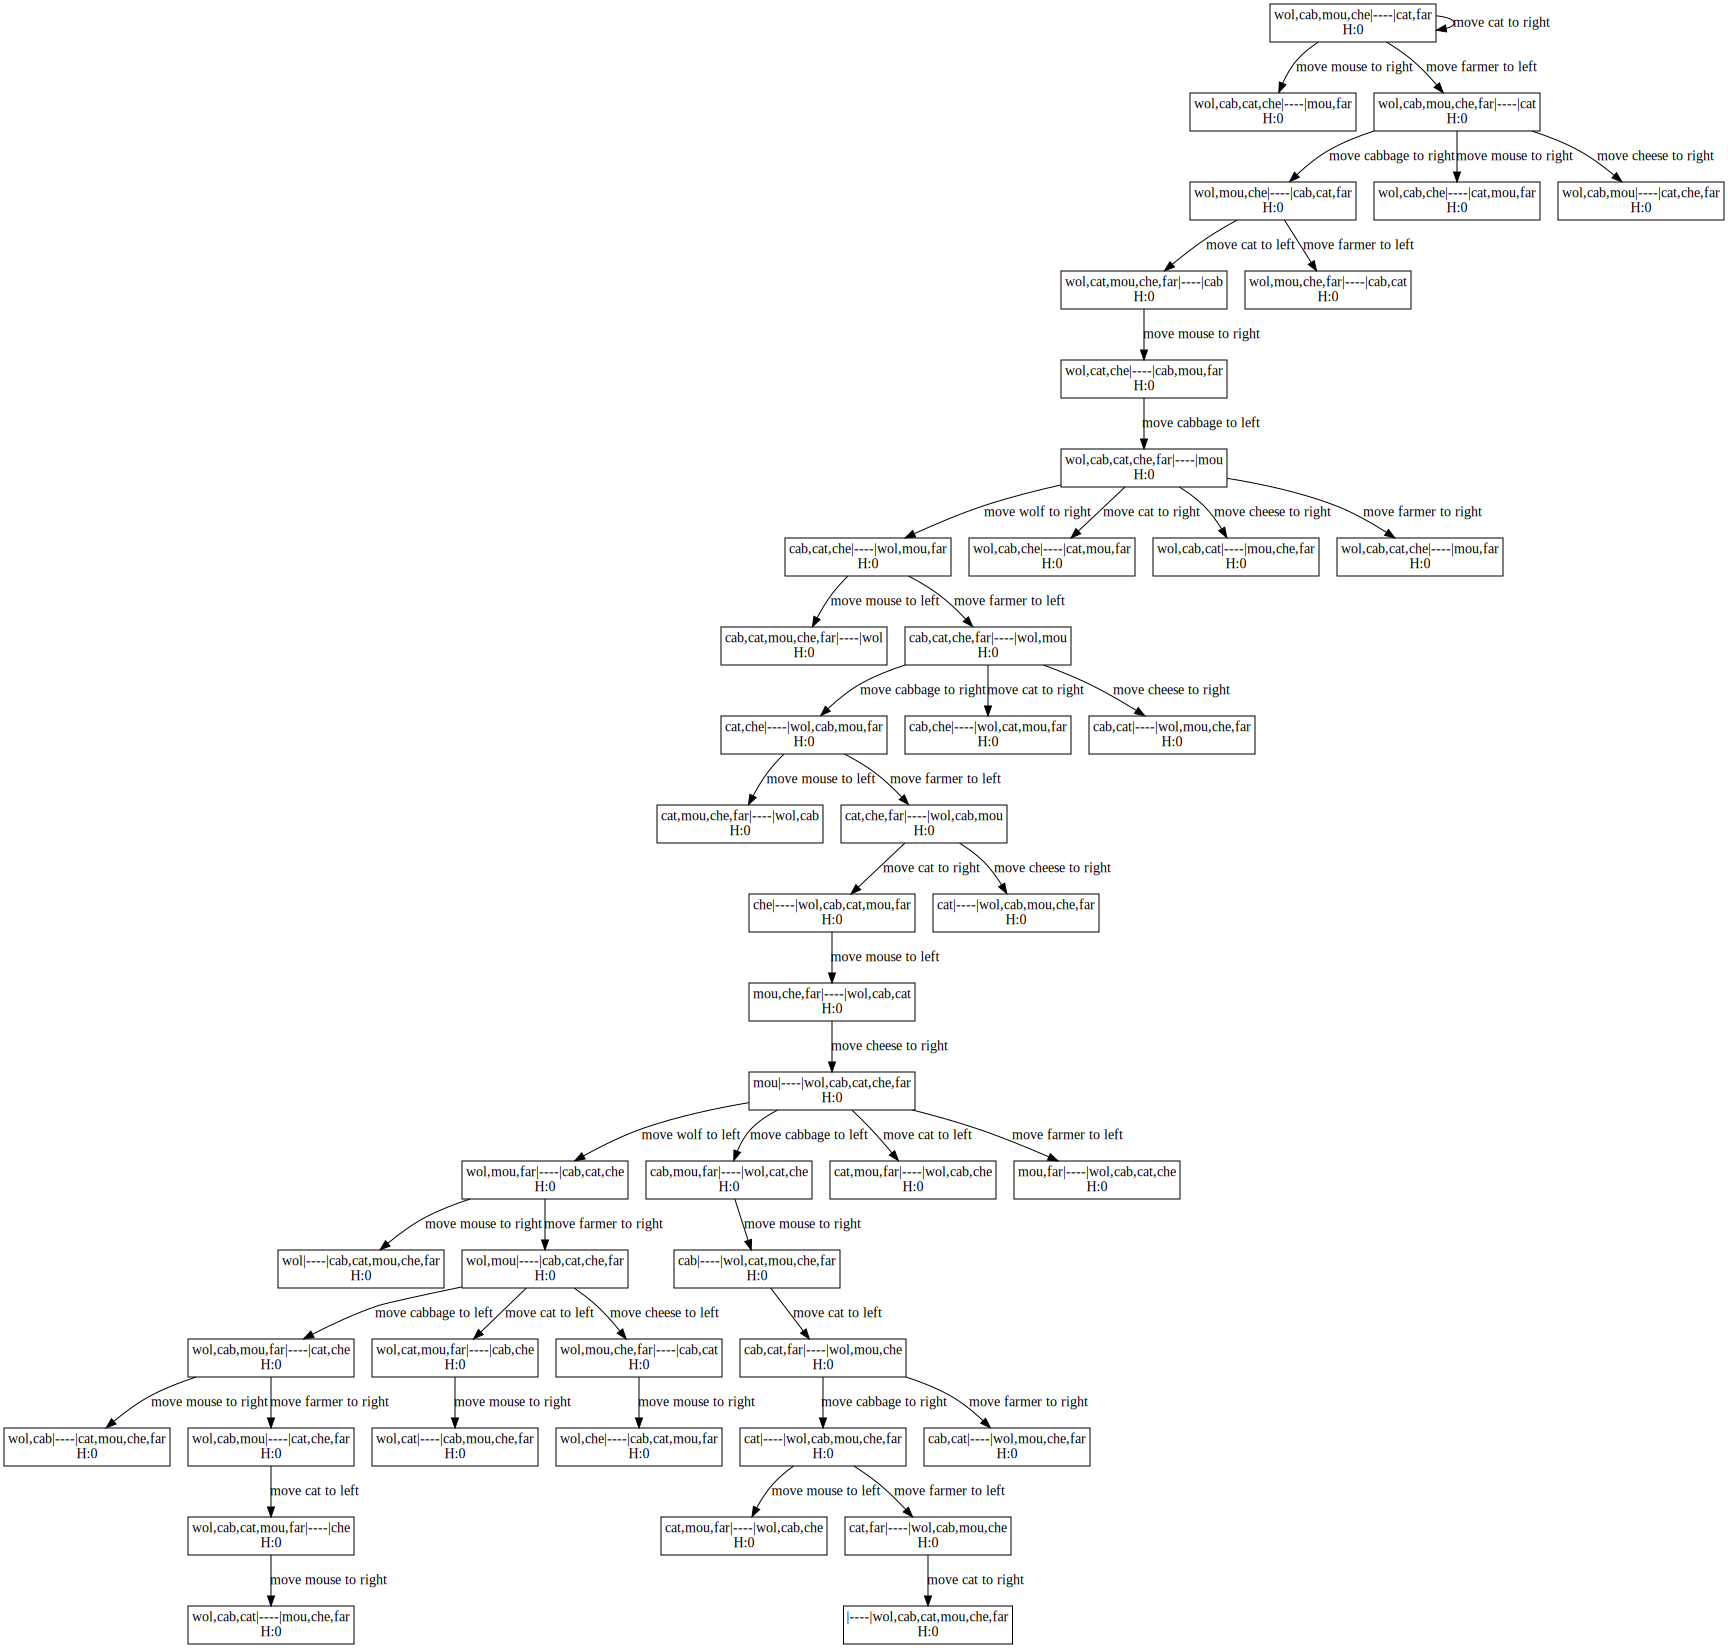

In [78]:
graph

In [79]:
def DepthFirstSearch( initial, isGoal, isValid, successors, depthLimit, log ):
    return search( initial, None, isGoal, isValid, successors, lambda x: 0, depthLimit, log )